In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('comp_dataset.csv')
comp_dataset = df.copy()
comp_dataset.drop(['index','ID'],axis='columns',inplace=True)
comp_dataset

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,33.00,12.00,1,1,0,0,NaN,2.00,1.00,16
1,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,33.00,12.00,1,1,0,0,NaN,2.00,1.00,15
2,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,59.00,3.00,1,0,0,0,Security staff,2.00,1.00,30
3,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.00,8.00,1,0,1,1,Sales staff,1.00,1.00,5
4,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.00,8.00,1,0,1,1,Sales staff,1.00,1.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,0,315000.00,Working,Secondary / secondary special,Married,House / apartment,48.00,7.00,1,0,0,0,Managers,2.00,1.00,12
36453,F,N,Y,0,157500.00,Commercial associate,Higher education,Married,House / apartment,34.00,4.00,1,0,1,1,Medicine staff,2.00,1.00,24
36454,F,N,Y,0,157500.00,Pensioner,Higher education,Married,House / apartment,34.00,4.00,1,0,1,1,Medicine staff,2.00,1.00,33
36455,F,N,Y,0,283500.00,Working,Secondary / secondary special,Married,House / apartment,49.00,2.00,1,0,0,0,Sales staff,2.00,1.00,10


In [3]:
comp_dataset.describe(percentiles=[.10,.25,.50,.90])

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
count,36457.00,36457.00,36457.00,36457.00,36457.00,36457.00,36457.00,36457.00,36457.00,36457.00,36457.00
mean,0.43,186685.74,43.78,6.04,1.00,0.23,0.29,0.09,2.20,1.00,21.33
std,0.74,101789.23,11.52,6.49,0.00,0.42,0.46,0.29,0.91,0.04,14.91
min,0.00,27000.00,21.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
10%,0.00,90000.00,29.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,5.00
25%,0.00,121500.00,34.00,1.00,1.00,0.00,0.00,0.00,2.00,1.00,9.00
50%,0.00,157500.00,43.00,4.00,1.00,0.00,0.00,0.00,2.00,1.00,18.00
90%,2.00,315000.00,60.00,15.00,1.00,1.00,1.00,0.00,3.00,1.00,44.00
max,19.00,1575000.00,69.00,43.00,1.00,1.00,1.00,1.00,20.00,1.00,61.00


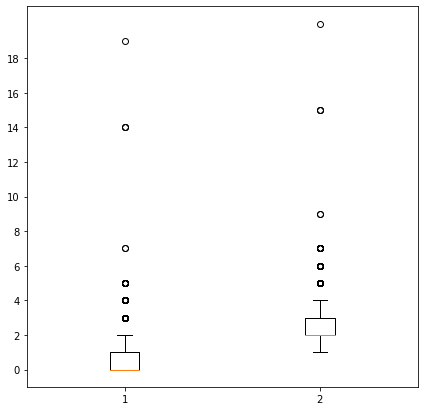

In [4]:
plt.figure(figsize=(7,7))
plt.boxplot(comp_dataset[['CNT_CHILDREN','CNT_FAM_MEMBERS']])
plt.yticks(np.arange(0,20,2))
plt.show()

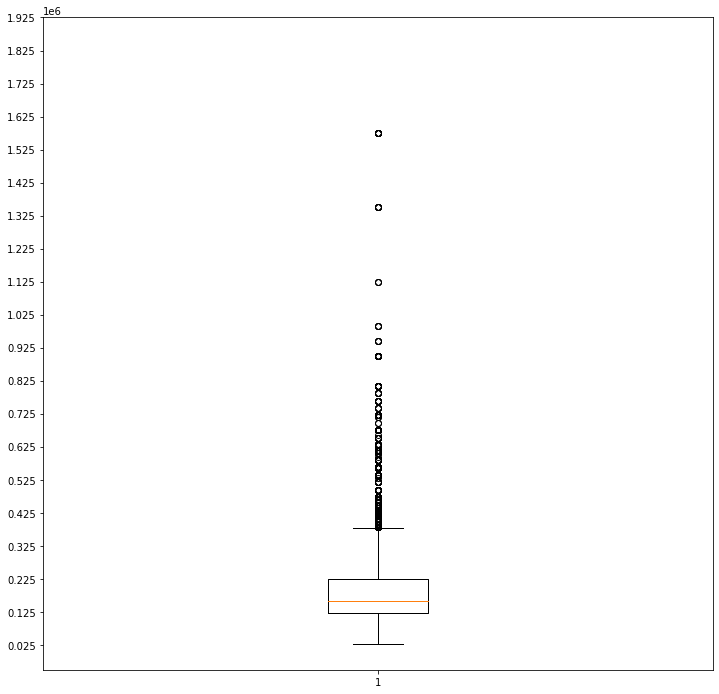

In [5]:
plt.figure(figsize=(12,12))
plt.boxplot(comp_dataset['AMT_INCOME_TOTAL'])
plt.yticks(np.arange(25000,2000000,100000))
plt.show()

In [6]:
isnull_sum = comp_dataset.isnull().sum()

num_vars = comp_dataset.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var]>0]

cat_vars = comp_dataset.select_dtypes(include=["object"]).columns
cat_vars_miss = [var for var in cat_vars if isnull_sum[var]>0]

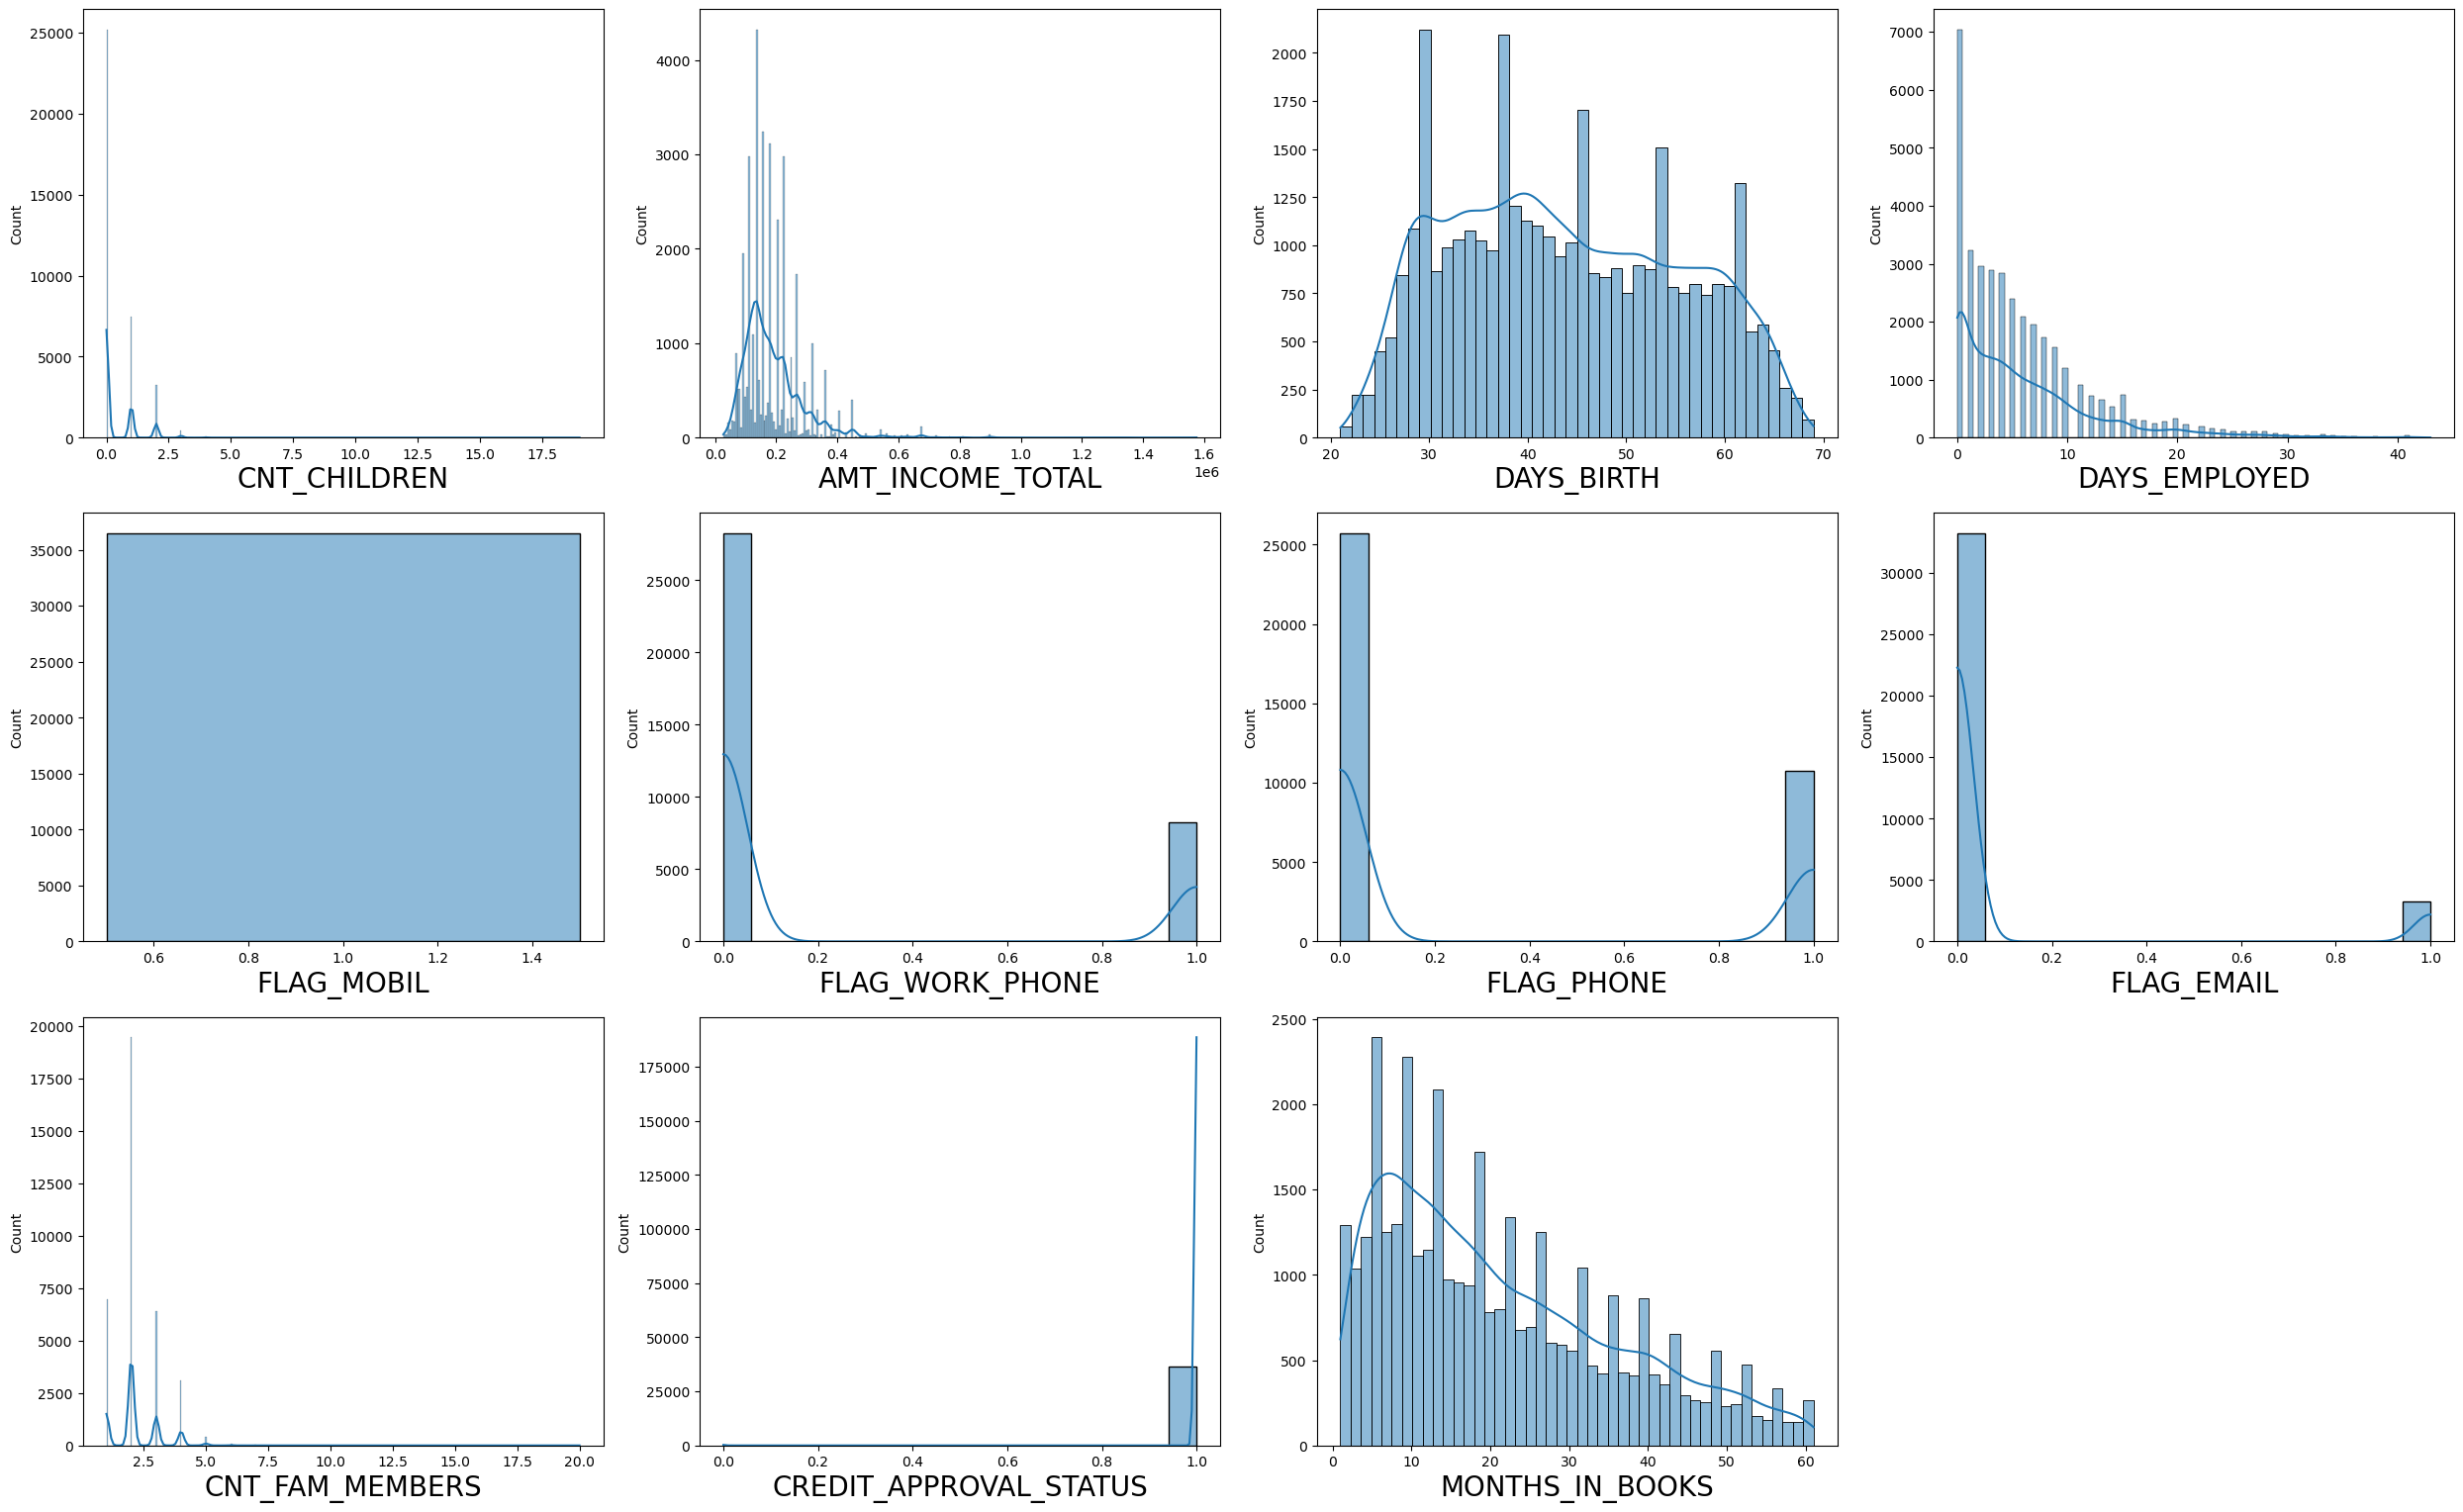

In [7]:
plt.figure(figsize=(25,25),dpi=100, facecolor='white')
plotnumber = 1
for column in num_vars:
    ax = plt.subplot(5,4,plotnumber)
    sns.histplot(comp_dataset[column],kde=True)
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [8]:
#Seperating discrete value features & continous value features
#dis_val_feat = [column for column in num_vars if len(comp_dataset[column].unique())<=5] 
#cont_val_feat = [column for column in num_vars if len(comp_dataset[column].unique())>5]

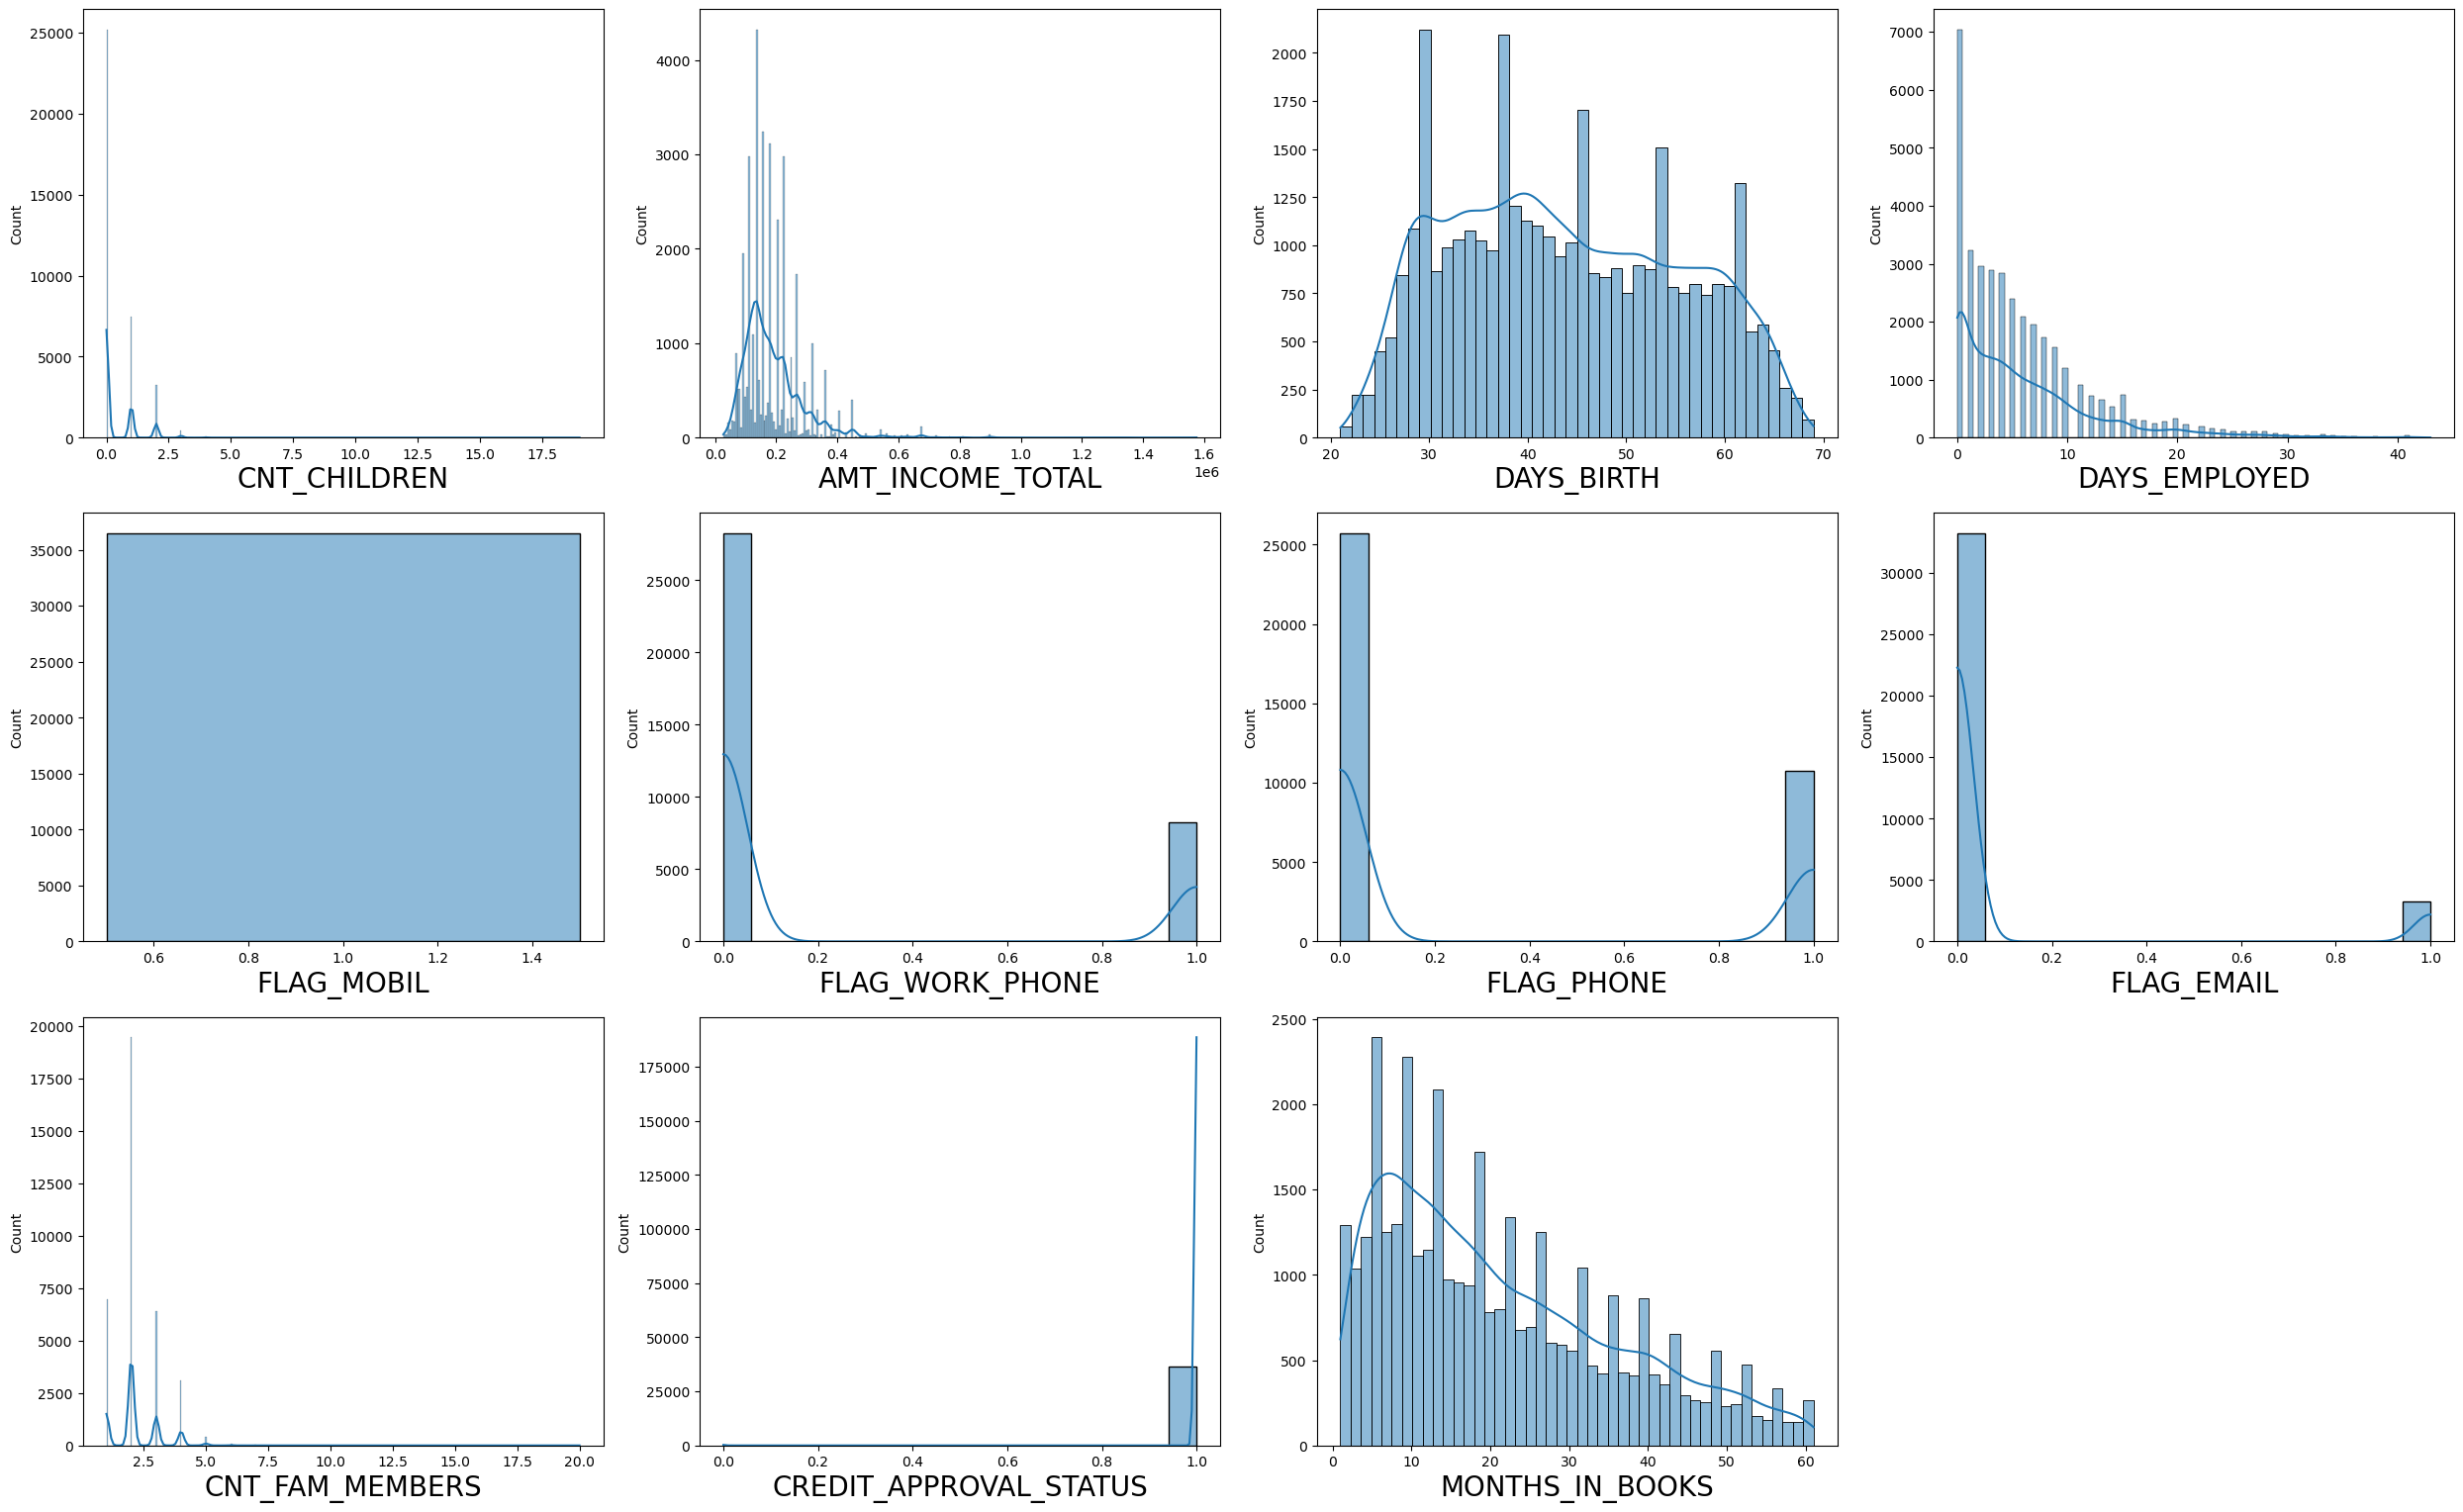

In [9]:
plt.figure(figsize=(25,25),dpi=100, facecolor='white')
plotnumber = 1
for column in num_vars:
    ax = plt.subplot(5,4,plotnumber)
    sns.histplot(comp_dataset[column],kde=True)
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

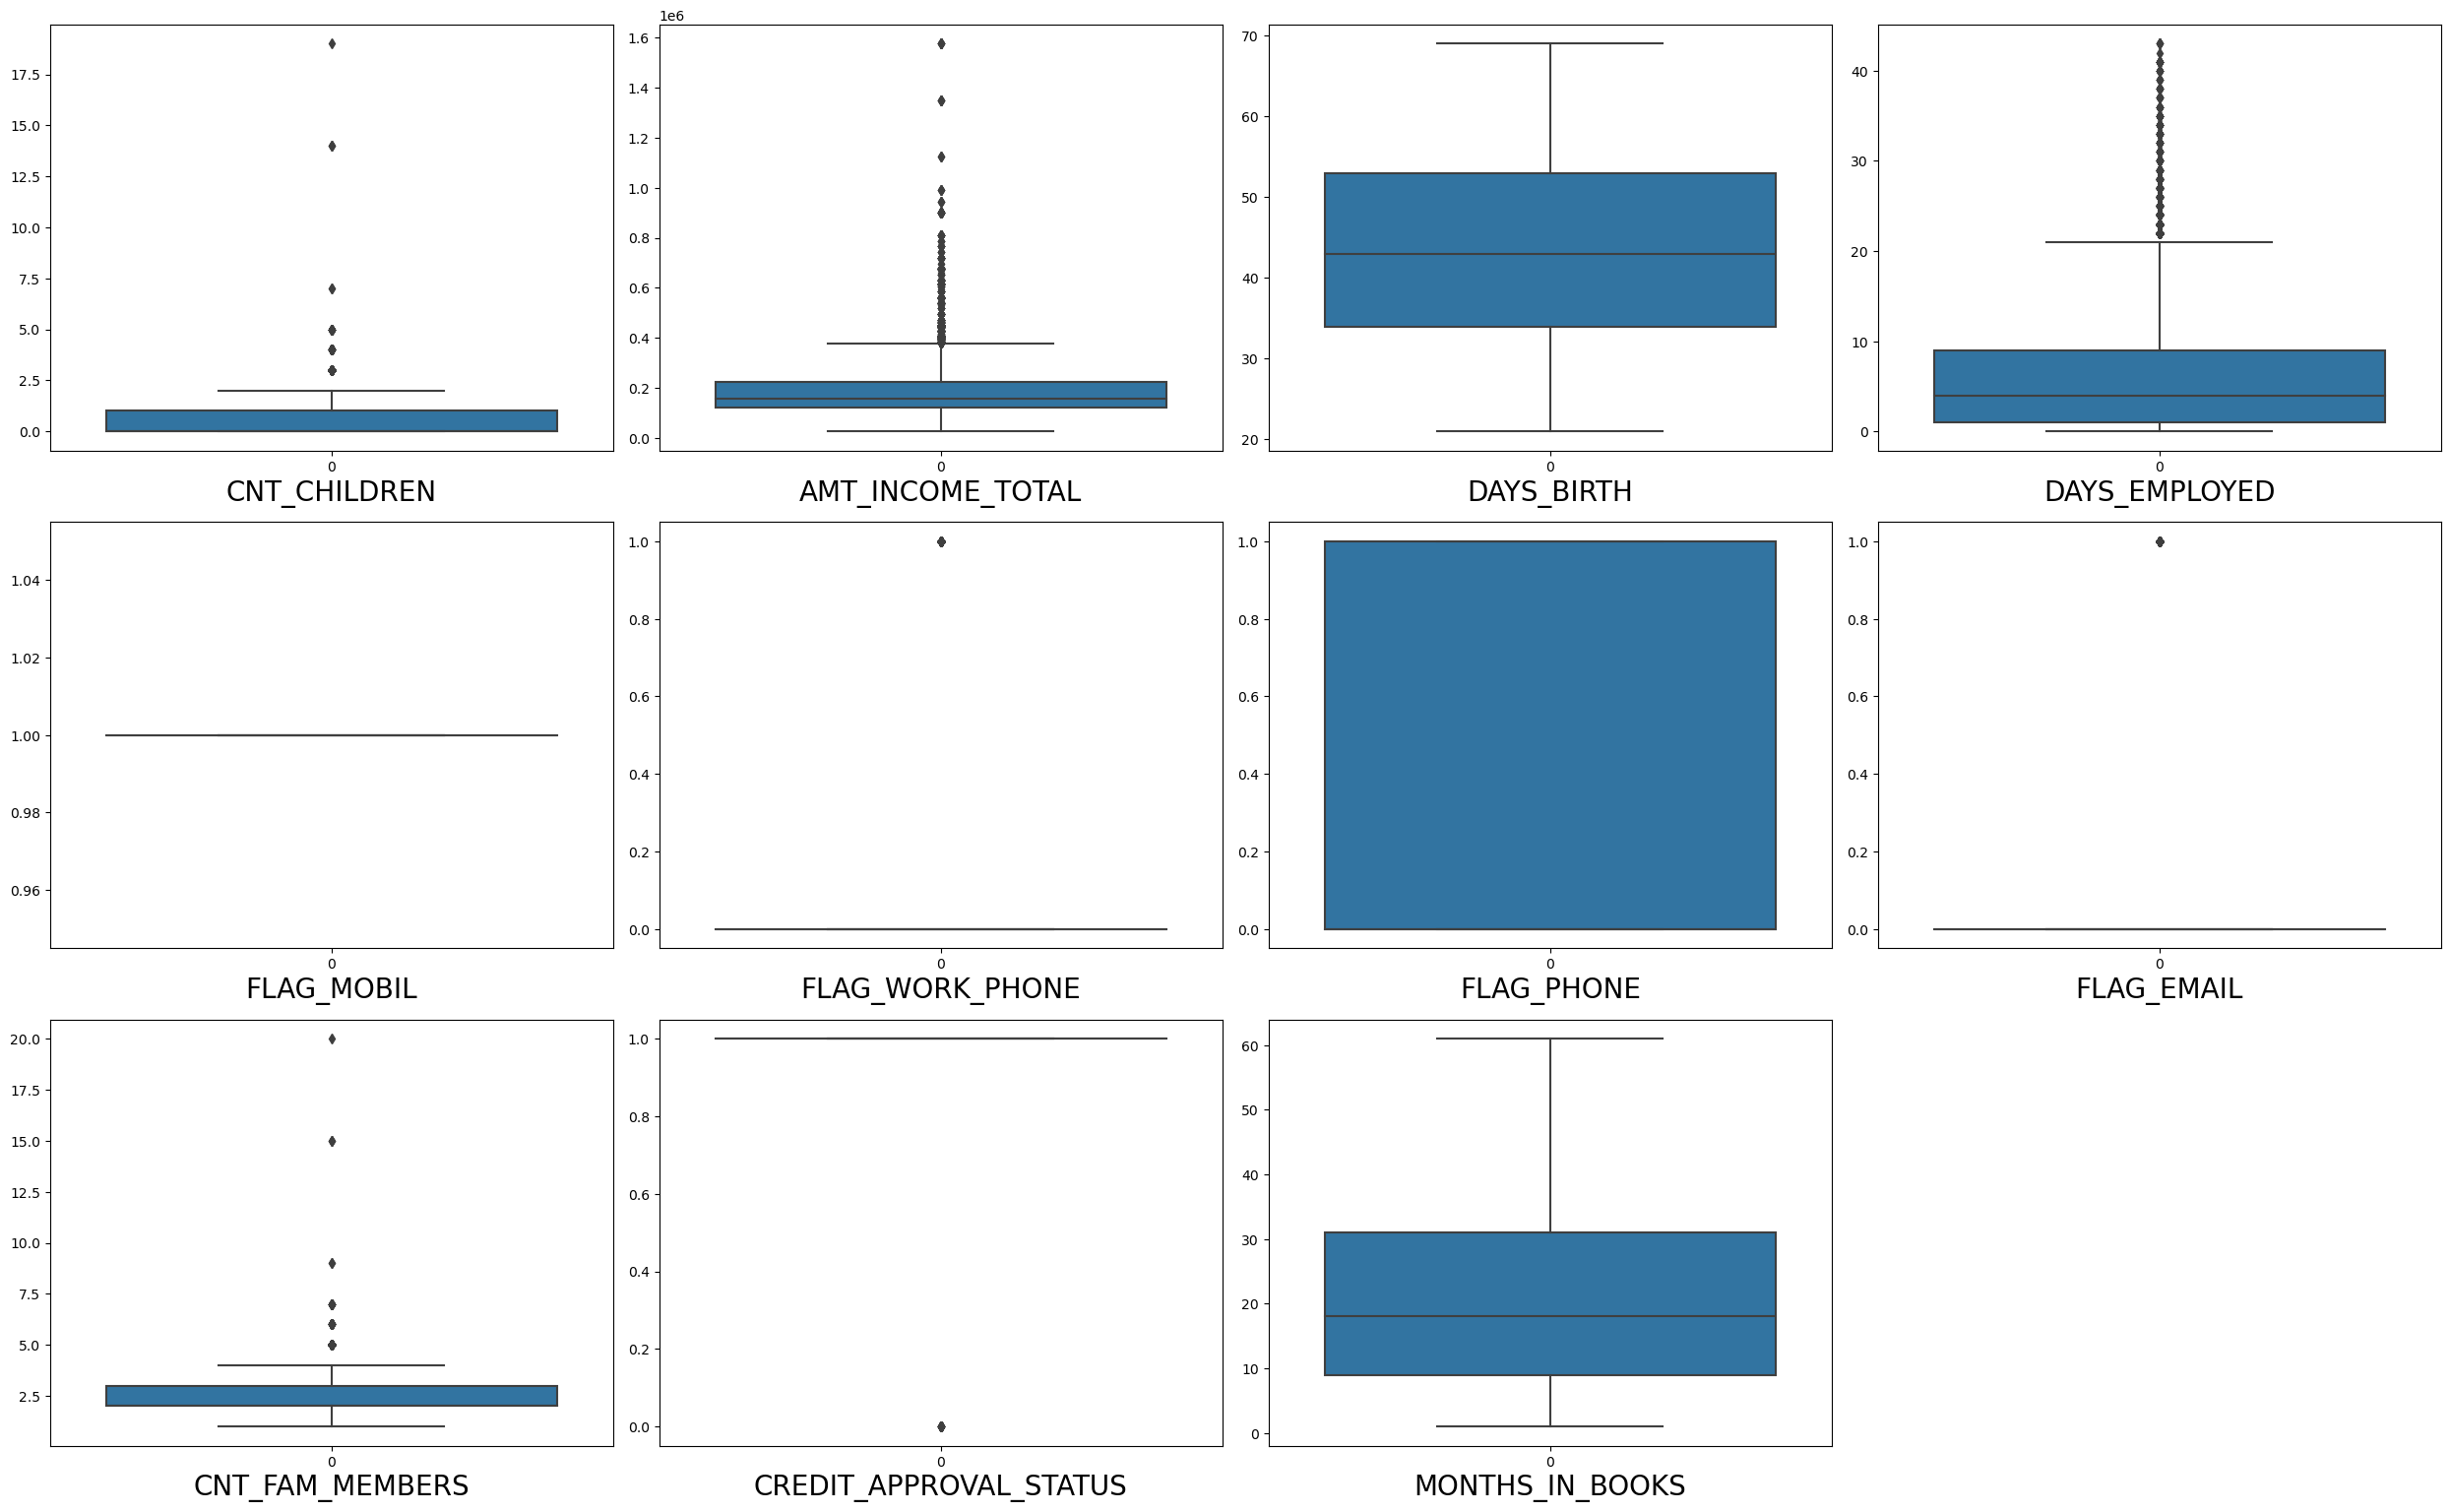

In [10]:
plt.figure(figsize=(25,25),dpi=100, facecolor='white')
plotnumber = 1
for column in num_vars:
    ax = plt.subplot(5,4,plotnumber)
    sns.boxplot(data=comp_dataset[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Meaning of Skewness
# 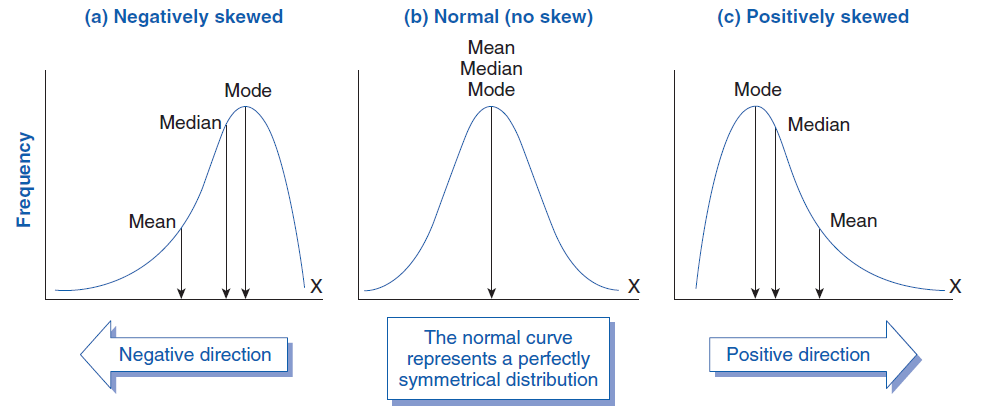

In [11]:
comp_dataset.skew(numeric_only=True)

CNT_CHILDREN               2.57
AMT_INCOME_TOTAL           2.74
DAYS_BIRTH                 0.18
DAYS_EMPLOYED              1.75
FLAG_MOBIL                 0.00
FLAG_WORK_PHONE            1.31
FLAG_PHONE                 0.90
FLAG_EMAIL                 2.87
CNT_FAM_MEMBERS            1.30
CREDIT_APPROVAL_STATUS   -26.95
MONTHS_IN_BOOKS            0.73
dtype: float64

In [12]:
unskewed_cols = [columns for columns in num_vars if ((comp_dataset[columns].skew())) > 1 | (comp_dataset[columns].skew()<-1)]
unskewed_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_EMPLOYED',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [13]:
for columns in unskewed_cols:
    comp_dataset[columns] = np.where(comp_dataset[columns]<comp_dataset[columns].quantile(.15),comp_dataset[columns].quantile(.15),comp_dataset[columns])
    comp_dataset[columns] = np.where(comp_dataset[columns]>comp_dataset[columns].quantile(.85),comp_dataset[columns].quantile(.85),comp_dataset[columns])
comp_dataset.skew(numeric_only=True)

CNT_CHILDREN               0.83
AMT_INCOME_TOTAL           0.40
DAYS_BIRTH                 0.18
DAYS_EMPLOYED              0.39
FLAG_MOBIL                 0.00
FLAG_WORK_PHONE            1.31
FLAG_PHONE                 0.90
FLAG_EMAIL                 0.00
CNT_FAM_MEMBERS           -0.10
CREDIT_APPROVAL_STATUS   -26.95
MONTHS_IN_BOOKS            0.73
dtype: float64

In [14]:
comp_dataset.corr().abs()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
CNT_CHILDREN,1.00,0.04,0.39,0.11,NaN,0.04,0.02,NaN,0.79,0.00,0.01
AMT_INCOME_TOTAL,0.04,1.00,0.09,0.13,NaN,0.04,0.00,NaN,0.02,0.00,0.03
DAYS_BIRTH,0.39,0.09,1.00,0.15,NaN,0.18,0.03,NaN,0.30,0.00,0.05
DAYS_EMPLOYED,0.11,0.13,0.15,1.00,NaN,0.14,0.04,NaN,0.12,0.02,0.08
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.04,0.04,0.18,0.14,NaN,1.00,0.31,NaN,0.06,0.00,0.02
FLAG_PHONE,0.02,0.00,0.03,0.04,NaN,0.31,1.00,NaN,0.00,0.01,0.02
FLAG_EMAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_FAM_MEMBERS,0.79,0.02,0.30,0.12,NaN,0.06,0.00,NaN,1.00,0.00,0.02
CREDIT_APPROVAL_STATUS,0.00,0.00,0.00,0.02,NaN,0.00,0.01,NaN,0.00,1.00,0.01


<AxesSubplot:>

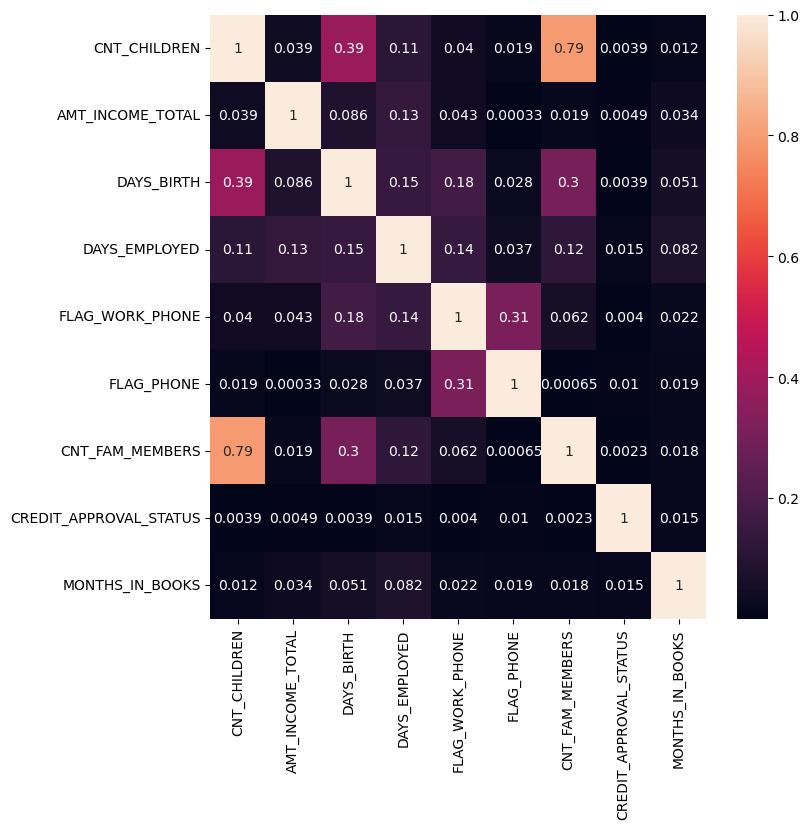

In [15]:
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(data=comp_dataset.drop(['FLAG_EMAIL','FLAG_MOBIL'],axis='columns').corr().abs(),annot=True) 